In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
import numpy as np


In [2]:
# Load the dataset
df = pd.read_csv('C:\\Users\\ACER\\Downloads\\CHAMPS.csv')


In [5]:
df.head()

,packet_version_id,id_ver_nmb,champs_id,dp_001,dp_002,dp_003,dp_004,dp_005,dp_006,dp_007,...,dpf_012___ch00040,dpf_012___ch00041,dpf_012___ch00042,dpf_012___ch00043,dpf_012___ch01424,dpf_012___ch01875,dpf_012___ch00010,dpf_013,dpf_014,crf_060302_decode_panel_feedback_form_complete
0,ETAA00002_01_01,2.0.0,ETAA00002,5,1,2,3,4.0,5.0,6.0,...,0,0,0,0,0,0,0,Tseyon Tesfaye Clinical,None,2
1,ETAA00004_01_02,2.0.0,ETAA00004,5,1,2,3,4.0,5.0,6.0,...,0,0,0,0,0,0,0,"Adugna (SBS team), Tigistu (counselor), Tseyon...",NaN,2
2,ETAA00005_01_02,2.0.0,ETAA00005,5,1,2,3,4.0,5.0,6.0,...,0,0,0,0,0,0,0,"Adugna (SBS team), Tigistu (counselor), Tseyon...",None,2
3,ETAA00008_01_04,2.0.0,ETAA00008,5,1,2,3,4.0,5.0,6.0,...,0,0,0,0,0,0,0,"Abdurahman Yonis(HO), Eyoel Taye(counselor), G...",The family leaves in a refugee camp and even t...,2
4,ETAA00009_01_01,2.0.0,ETAA00009,5,18,19,20,21.0,7.0,NaN,...,0,0,0,0,0,0,0,NaN,NaN,0


In [6]:
# Determine the number of rows and columns
num_rows, num_columns = df.shape
print(f'The dataset contains {num_rows} rows and {num_columns} columns.')

# Enumerate the columns
columns = df.columns
print('The columns in the dataset are:', columns.tolist())

# Rename the columns
df.rename(columns={
    'champs_id': 'champs_id',
    'dp_013': 'case_type',
    'dp_108': 'underlying_cause',
    'dp_118': 'maternal_condition'
}, inplace=True)


The dataset contains 444 rows and 381 columns.
The columns in the dataset are: ['packet_version_id', 'id_ver_nmb', 'champs_id', 'dp_001', 'dp_002', 'dp_003', 'dp_004', 'dp_005', 'dp_006', 'dp_007', 'dp_008', 'dp_009', 'dp_010', 'dp_011', 'dp_012', 'dp_013', 'dp_153', 'dp_016', 'dp_017', 'dp_154', 'dp_155', 'dp_014', 'dp_108', 'dp_109', 'dp_110', 'dp_111', 'dp_112', 'dp_113', 'dp_114', 'dp_115', 'dp_116', 'dp_117', 'dp_157', 'dp_018', 'dp_019', 'dp_020', 'dp_021', 'dp_022', 'dp_023', 'dp_024', 'dp_025', 'dp_026', 'dp_027', 'dp_156', 'dp_028', 'dp_029', 'dp_030', 'dp_031', 'dp_032', 'dp_033', 'dp_034', 'dp_035', 'dp_036', 'dp_037', 'dp_038', 'dp_039', 'dp_040', 'dp_041', 'dp_042', 'dp_043', 'dp_044', 'dp_045', 'dp_046', 'dp_047', 'dp_048', 'dp_049', 'dp_050', 'dp_051', 'dp_052', 'dp_053', 'dp_054', 'dp_055', 'dp_056', 'dp_057', 'dp_058', 'dp_059', 'dp_060', 'dp_061', 'dp_062', 'dp_063', 'dp_064', 'dp_065', 'dp_066', 'dp_067', 'dp_068', 'dp_069', 'dp_070', 'dp_071', 'dp_072', 'dp_073', 'd

In [7]:
# Define a dictionary for renaming the case_type values
case_type_mapping = {
    'CH00716': 'Stillbirth',
    'CH01404': 'Death in the first 24 hours',
    'CH01405': 'Early Neonate (1 to 6 days)',
    'CH01406': 'Late Neonate (7 to 27 days)',
    'CH00718': 'Infant (28 days to less than 12 months)',
    'CH00719': 'Child (12 months to less than 60 months)'
}

# Apply the mapping to the case_type column
df['case_type'] = df['case_type'].map(case_type_mapping)

# Display the updated case_type column
df['case_type'].value_counts()


Stillbirth                                  239
Death in the first 24 hours                  69
Early Neonate (1 to 6 days)                  49
Child (12 months to less than 60 months)     42
Infant (28 days to less than 12 months)      27
Late Neonate (7 to 27 days)                  18
Name: case_type, dtype: int64

In [10]:
# Show proportion of null values
null_values = df.isnull().mean() * 100
print("Proportion of null values in each column:\n", null_values)

# Handle missing values
df.fillna('Unknown', inplace=True)

# Ensure all data is of type string for encoding
df = df.astype(str)


Proportion of null values in each column:
 packet_version_id                                  0.000000
id_ver_nmb                                         0.000000
champs_id                                          0.000000
dp_001                                             0.000000
dp_002                                             0.000000
                                                    ...    
dpf_012___ch01875                                  0.000000
dpf_012___ch00010                                  0.000000
dpf_013                                           59.009009
dpf_014                                           59.909910
crf_060302_decode_panel_feedback_form_complete     0.000000
Length: 381, dtype: float64


In [9]:
# Magnitude and proportion of each infant underlying cause
infant_cause_counts = df['underlying_cause'].value_counts()
infant_cause_proportion = df['underlying_cause'].value_counts(normalize=True) * 100
print("Infant Underlying Causes Count:\n", infant_cause_counts)
print("Infant Underlying Causes Proportion:\n", infant_cause_proportion)

# Proportion and magnitude of maternal factors contributing to child death
maternal_factors_counts = df['maternal_condition'].value_counts()
maternal_factors_proportion = df['maternal_condition'].value_counts(normalize=True) * 100
print("Maternal Factors Count:\n", maternal_factors_counts)
print("Maternal Factors Proportion:\n", maternal_factors_proportion)

# Proportion of the child death by case type
case_type_counts = df['case_type'].value_counts()
case_type_proportion = df['case_type'].value_counts(normalize=True) * 100
print("Case Type Count:\n", case_type_counts)
print("Case Type Proportion:\n", case_type_proportion)


Infant Underlying Causes Count:
 Intrauterine hypoxia                                148
Birth asphyxia                                       33
Undetermined                                         28
Severe acute malnutrition                            24
Craniorachischisis                                   16
                                                   ... 
Severe acute malnutrition-Kwashiorkor                 1
severe acute malnutrition, Marasmic Kwashiorkor       1
Severe acute malnutrition - Marasmic kwashiorkor      1
Congenital CMV infection                              1
Bacterial sepsis of the newborn                       1
Name: underlying_cause, Length: 97, dtype: int64
Infant Underlying Causes Proportion:
 Intrauterine hypoxia                                33.333333
Birth asphyxia                                       7.432432
Undetermined                                         6.306306
Severe acute malnutrition                            5.405405
Craniorachischis

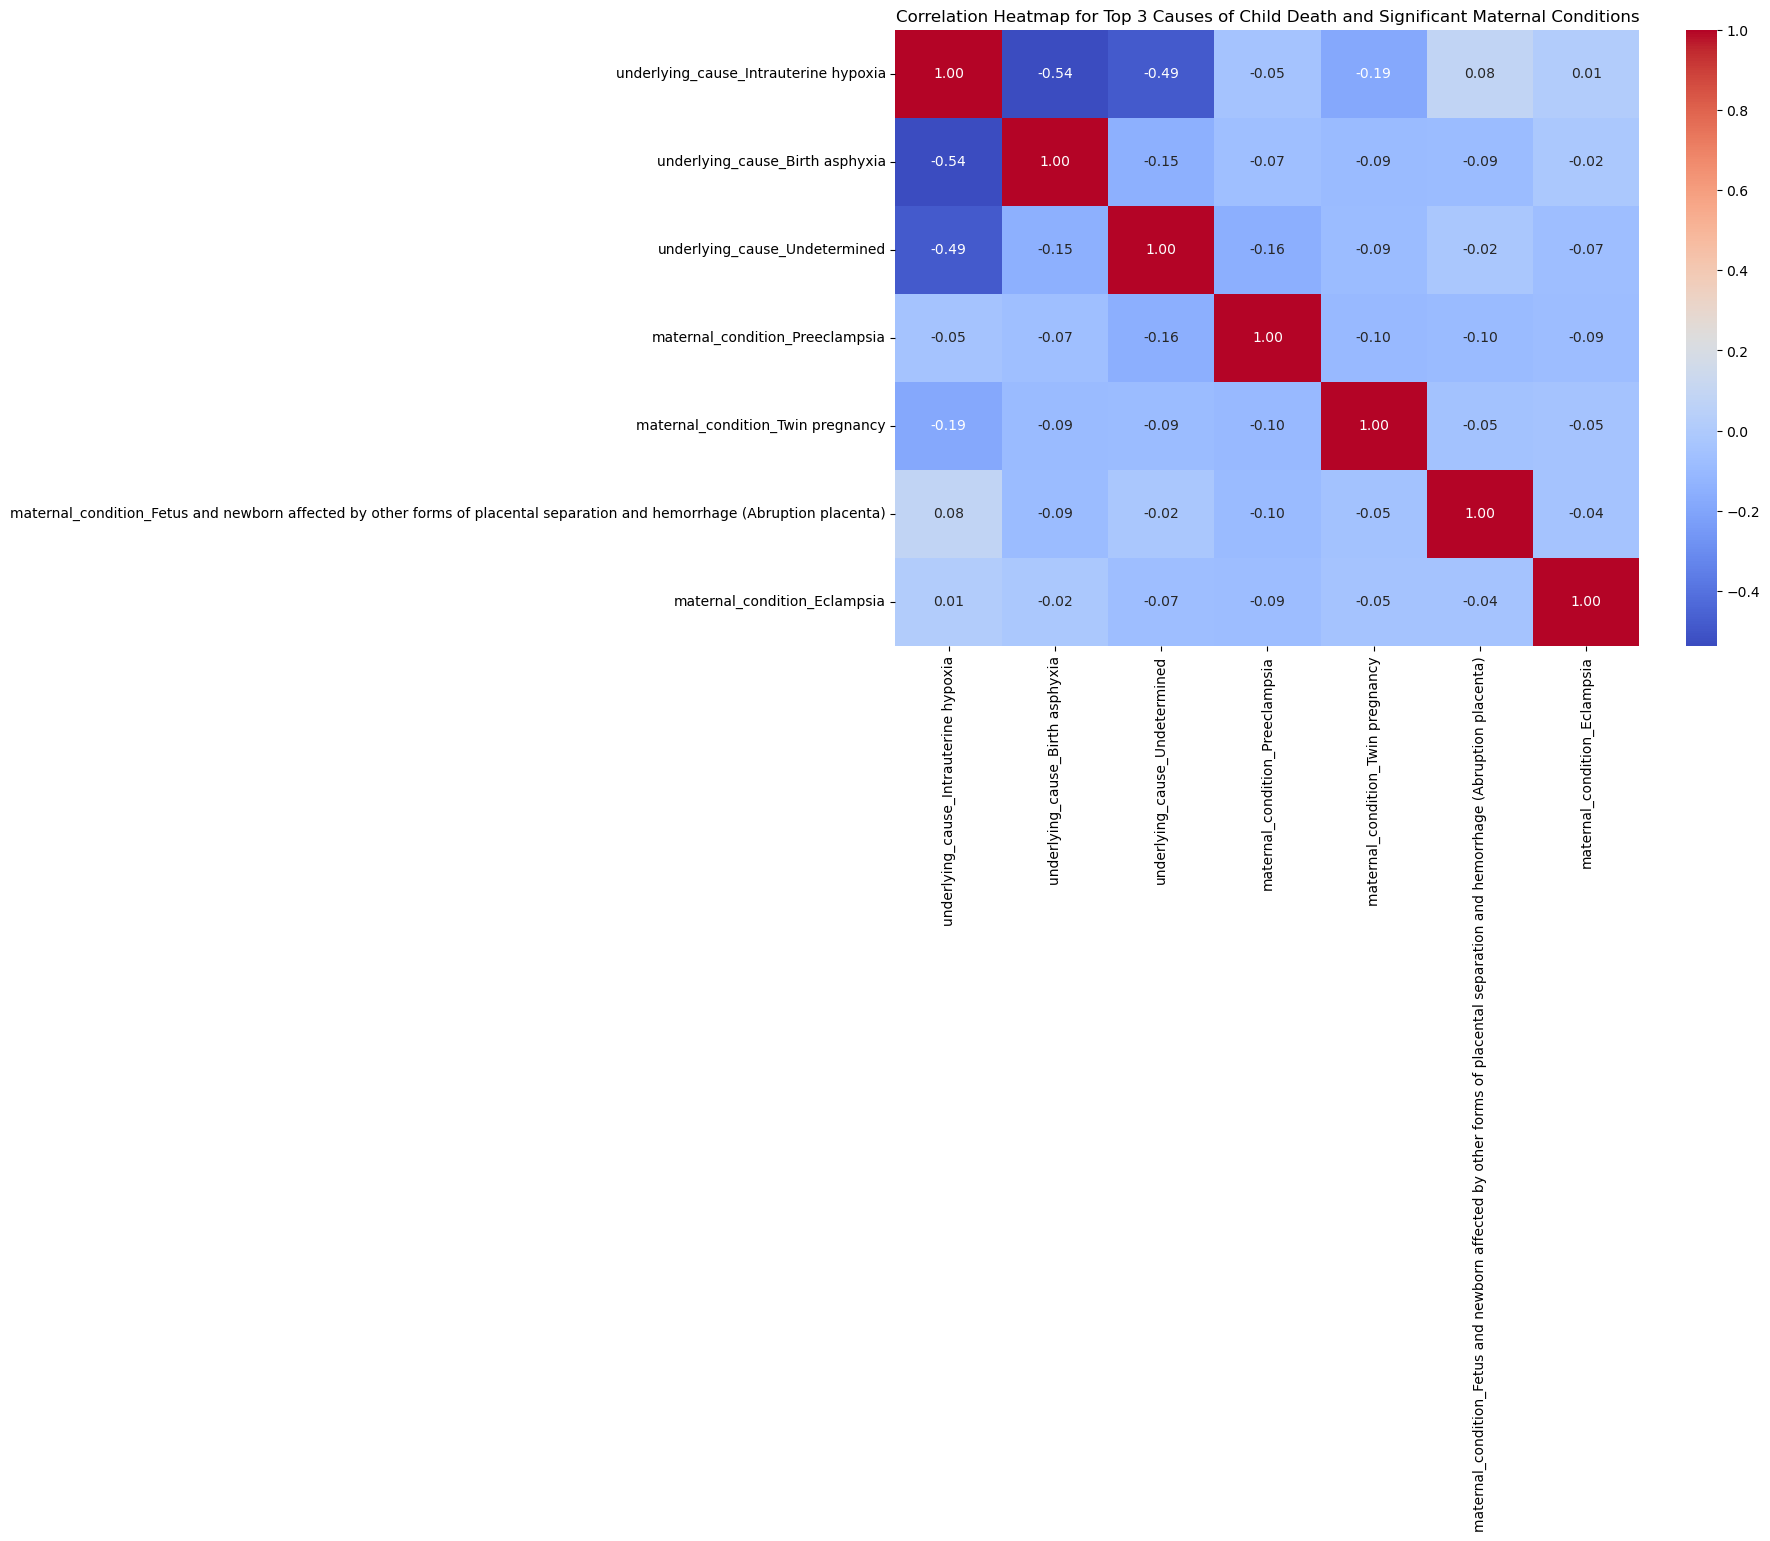

In [11]:
# Define the top three causes and significant maternal conditions
top_three_causes = ['Intrauterine hypoxia', 'Birth asphyxia', 'Undetermined']
maternal_conditions = ['Preeclampsia', 'Twin pregnancy', 
                       'Fetus and newborn affected by other forms of placental separation and hemorrhage (Abruption placenta)', 
                       'Eclampsia']

# Filter the DataFrame to only include rows with these causes or conditions
filtered_df = df[(df['underlying_cause'].isin(top_three_causes)) | (df['maternal_condition'].isin(maternal_conditions))]

# One-hot encode the relevant columns
encoded_df = pd.get_dummies(filtered_df[['underlying_cause', 'maternal_condition']])

# Calculate the correlation matrix
correlation_matrix = encoded_df.corr()

# Filter the correlation matrix to include only the relevant columns
columns_of_interest = [f'underlying_cause_{cause}' for cause in top_three_causes] + [f'maternal_condition_{condition}' for condition in maternal_conditions]
correlation_relevant = correlation_matrix.loc[columns_of_interest, columns_of_interest]

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_relevant, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap for Top 3 Causes of Child Death and Significant Maternal Conditions')
plt.show()

In [12]:

# Combine rare classes
threshold = 2  # Minimum number of instances a class must have
value_counts = df['underlying_cause'].value_counts()
rare_classes = value_counts[value_counts < threshold].index
df['underlying_cause'] = df['underlying_cause'].apply(lambda x: 'Rare' if x in rare_classes else x)

# Ensure all data is of type string for encoding
df = df.astype(str)

# Encode the categorical variables
label_encoder = LabelEncoder()
df_encoded = df.apply(label_encoder.fit_transform)


In [13]:
# Scale the data
scaler = StandardScaler()
X = scaler.fit_transform(df_encoded.drop(columns=['underlying_cause']))
y = df_encoded['underlying_cause']

In [14]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


Logistic Regression - Accuracy: 0.4943820224719101, AUC: 0.9151481995819831
SVM - Accuracy: 0.449438202247191, AUC: 0.9278079367083282
AdaBoost - Accuracy: 0.20224719101123595, AUC: 0.9032599699813436
Random Forest - Accuracy: 0.5617977528089888, AUC: 0.9539269733058396
Gradient Boosting - Accuracy: 0.5393258426966292, AUC: 0.9153551038729677
XGBoost - Accuracy: 0.6966292134831461, AUC: 0.9483861465303203


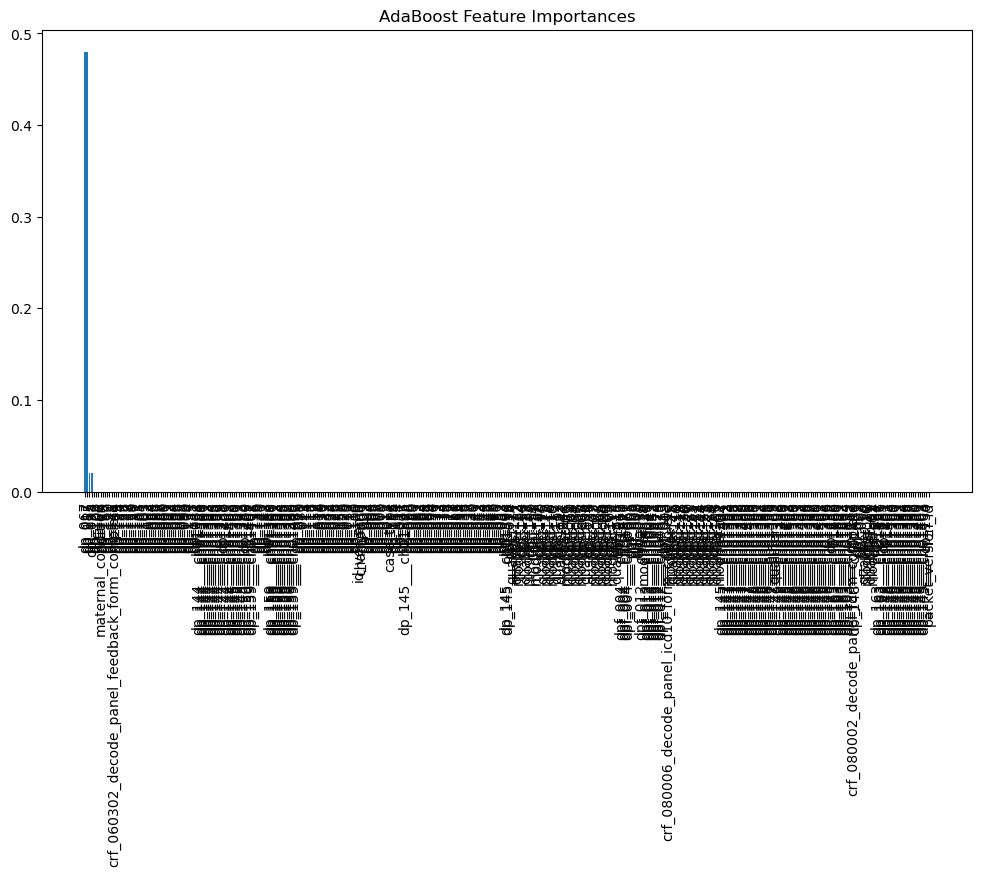

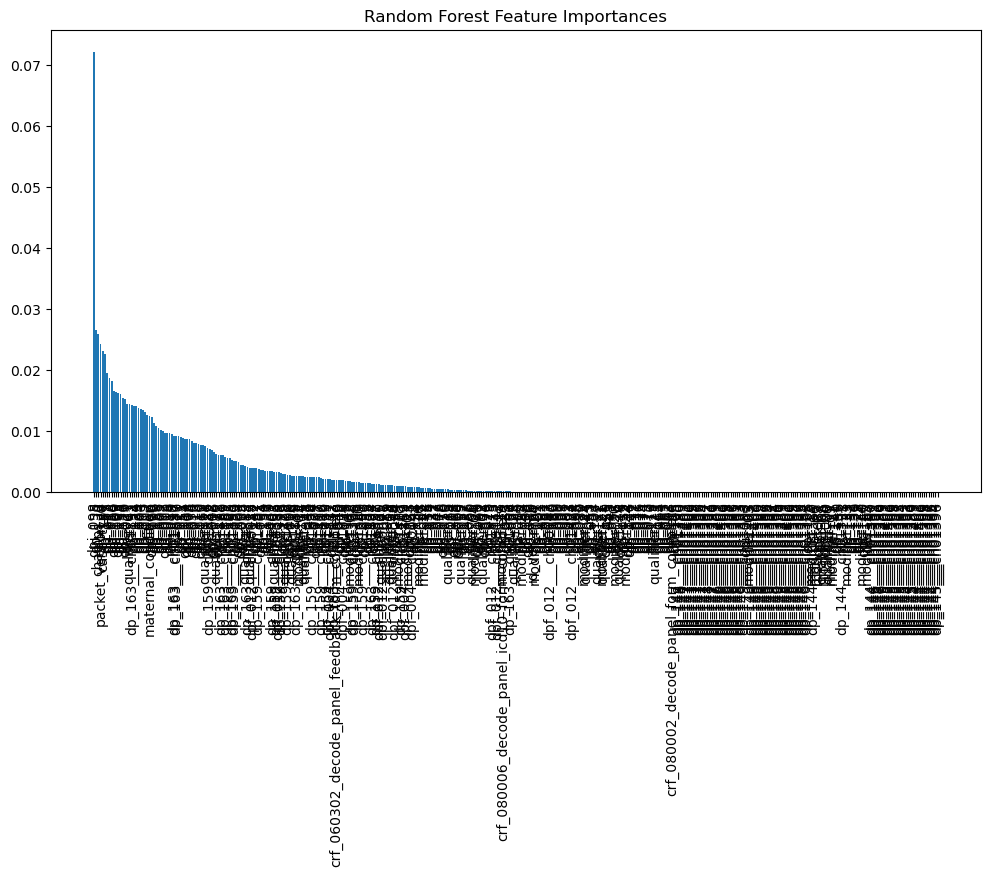

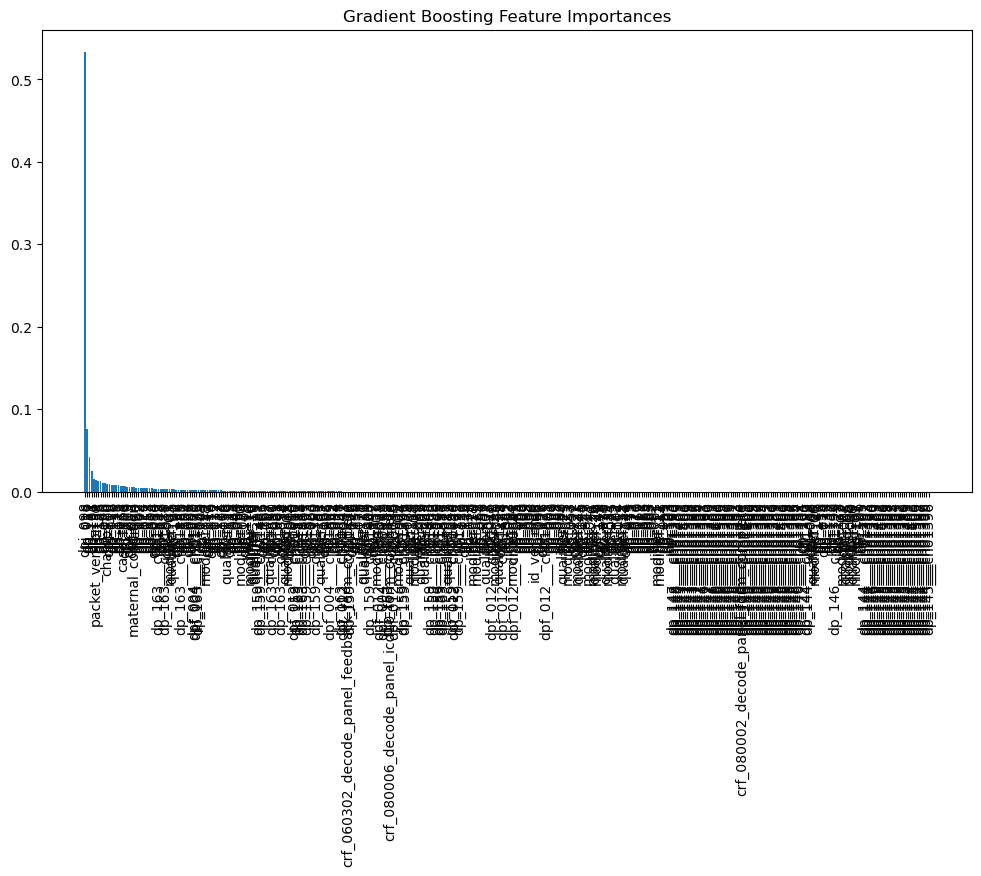

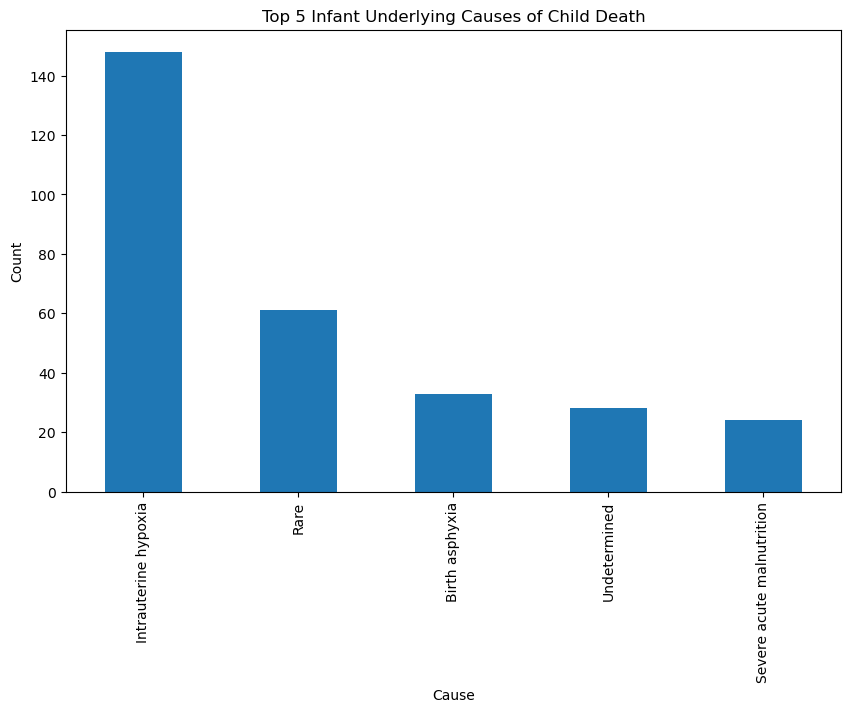

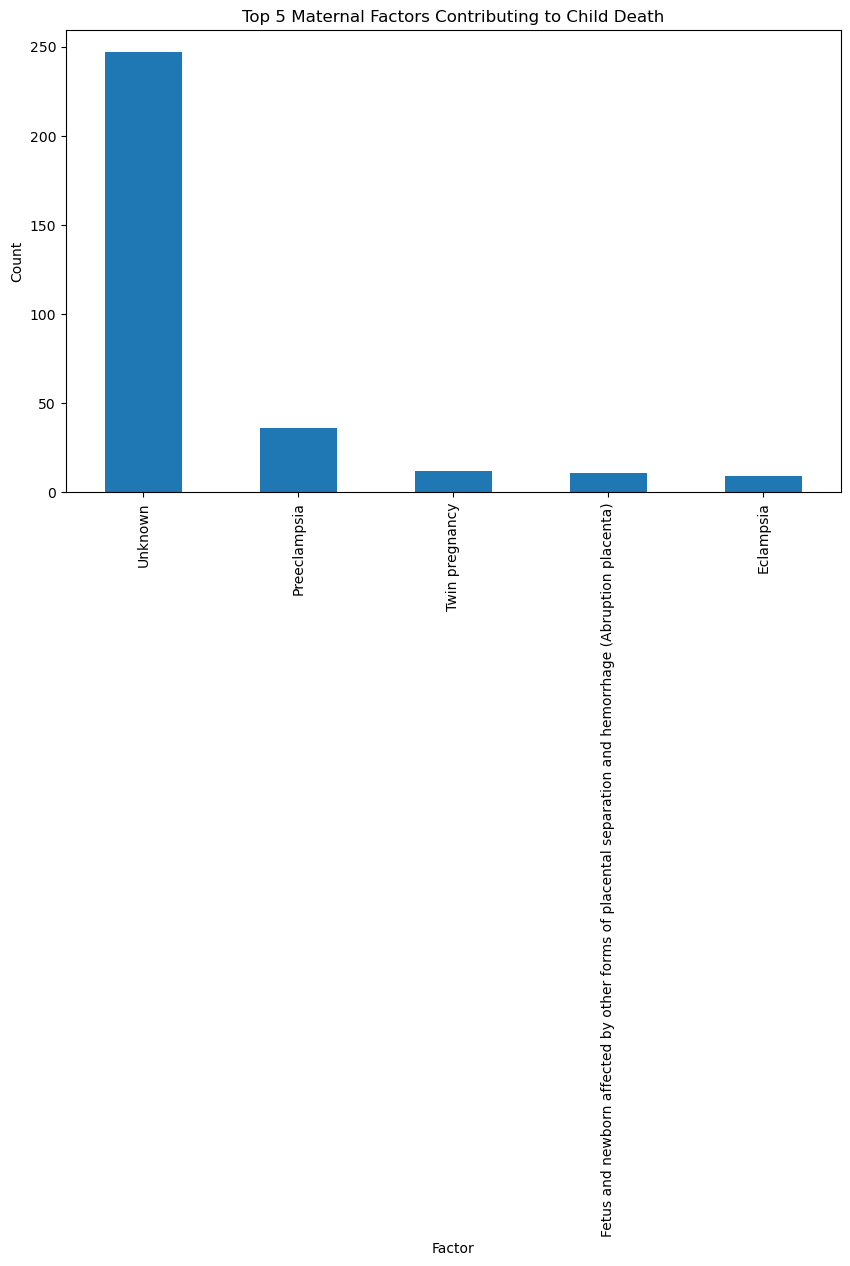

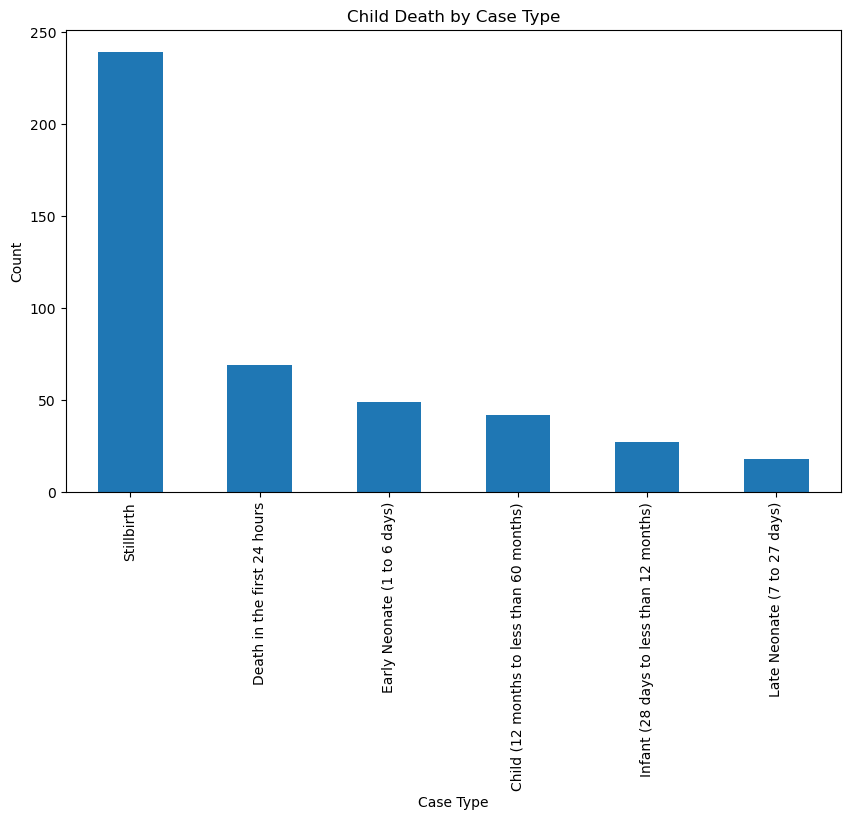

In [24]:

# Train and evaluate models
results = {}
for name, model in models.items():
    if isinstance(model, (LogisticRegression, SVC)):
        clf = OneVsRestClassifier(model)
    else:
        clf = model
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    # Calculate AUC
    if hasattr(clf, "predict_proba"):
        y_score = clf.predict_proba(X_test)
        try:
            if len(np.unique(y_train)) > 2:
                y_test_bin = label_binarize(y_test, classes=np.unique(y_train))
                auc = roc_auc_score(y_test_bin, y_score, average='micro')
            else:
                auc = roc_auc_score(y_test, y_score[:, 1])
        except ValueError as e:
            print(f"Error calculating AUC for {name}: {e}")
            auc = "N/A"
    else:
        auc = "N/A"
    
    results[name] = {'accuracy': accuracy, 'auc': auc}
    print(f"{name} - Accuracy: {accuracy}, AUC: {auc}")

# Feature importance
for name, model in models.items():
    if hasattr(model, 'feature_importances_'):
        feature_importances = model.feature_importances_
        sorted_idx = np.argsort(feature_importances)[::-1]
        plt.figure(figsize=(12, 6))
        plt.bar(range(X.shape[1]), feature_importances[sorted_idx], align='center')
        plt.xticks(range(X.shape[1]), df_encoded.columns.drop('underlying_cause')[sorted_idx], rotation=90)
        plt.title(f'{name} Feature Importances')
        plt.show()

# Plot top five infant underlying causes of the child death
infant_cause_counts = df['underlying_cause'].value_counts()
infant_cause_counts.head(5).plot(kind='bar', figsize=(10, 6))
plt.title('Top 5 Infant Underlying Causes of Child Death')
plt.xlabel('Cause')
plt.ylabel('Count')
plt.show()

# Plot top five maternal factors contributing to the child death
maternal_factors_counts = df['maternal_condition'].value_counts()
maternal_factors_counts.head(5).plot(kind='bar', figsize=(10, 6))
plt.title('Top 5 Maternal Factors Contributing to Child Death')
plt.xlabel('Factor')
plt.ylabel('Count')
plt.show()

# Plot child death based on case types
case_type_counts = df['case_type'].value_counts()
case_type_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Child Death by Case Type')
plt.xlabel('Case Type')
plt.ylabel('Count')
plt.show()